Graph Plot


In [135]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.calibration import label_binarize
from itertools import cycle


def roc_plot(y_test, y_pred):
    rice = {
        0: 'Cammeo',
        1: 'Osmanscik',
    }

    plt.figure(figsize=(10, 5))

    colors = cycle(['red', 'blue'])

    for i, class_name in rice.items():
        fpr, tpr, _ = roc_curve(y_test, y_pred)
        roc_auc = auc(fpr, tpr)

        color = next(colors)

        plt.subplot(1, 2, i + 1)
        plt.plot(fpr, tpr, color=color, lw=2,
                 label=f'ROC Curve: {class_name} (area = {roc_auc:.2f})')

        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([-.05, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {class_name}')
        plt.legend(loc='lower right')

    plt.tight_layout()
    plt.show()

Neural Network


In [136]:
import numpy as np
import pandas as pd
import seaborn as sns

cols = ['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
        'Eccentricity', 'Convex_Area', 'Extent', 'Class']

data = pd.read_csv('./data/Rice_Cammeo_Osmancik.arff', names=cols)
data['Class'] = (data['Class'] == 'Osmancik').astype(int)

In [137]:
from sklearn.preprocessing import StandardScaler

x = data.iloc[:, 0:7].values
y = data.iloc[:, -1]

scaler = StandardScaler()
x = scaler.fit_transform(x)

In [138]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=.3, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=.15, random_state=42)

y_train = y_train.astype(int)
y_val = y_val.astype(int)
y_test = y_test.astype(int)

model = tf.keras.layers.Sequential()
model.add(tf.keras.layers.Dense(128, input_shape=(7,),
          kernel_initializer='normal', activation='tanh'))
model.add(tf.keras.layers.Dropout(.4))
model.add(tf.keras.layers.Dense(64, activation='tanh'))
model.add(tf.keras.layers.Dropout(.4))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adadelta(
    learning_rate=.0025), metrics=['accuracy'])


model.fit(x_train, y_train, batch_size=32, shuffle=True, epochs=200, callbacks=tf.keras.callbacks.EarlyStopping(
    monitor='loss'), validation_data=(x_val, y_val))

y_pred = model.predict(x_test)

Epoch 1/200
71/71 [==============================] - 1s 3ms/step - loss: 0.6340 - accuracy: 0.7034 - val_loss: 0.6136 - val_accuracy: 0.8703
Epoch 2/200
71/71 [==============================] - 0s 2ms/step - loss: 0.6161 - accuracy: 0.7436 - val_loss: 0.6004 - val_accuracy: 0.8828
Epoch 3/200
71/71 [==============================] - 0s 2ms/step - loss: 0.6024 - accuracy: 0.7652 - val_loss: 0.5875 - val_accuracy: 0.9002
Epoch 4/200
71/71 [==============================] - 0s 2ms/step - loss: 0.5906 - accuracy: 0.7855 - val_loss: 0.5747 - val_accuracy: 0.9052
Epoch 5/200
71/71 [==============================] - 0s 2ms/step - loss: 0.5791 - accuracy: 0.8049 - val_loss: 0.5621 - val_accuracy: 0.9077
Epoch 6/200
71/71 [==============================] - 0s 2ms/step - loss: 0.5699 - accuracy: 0.8350 - val_loss: 0.5497 - val_accuracy: 0.9077
Epoch 7/200
71/71 [==============================] - 0s 2ms/step - loss: 0.5536 - accuracy: 0.8438 - val_loss: 0.5376 - val_accuracy: 0.9102
Epoch 8/200
7

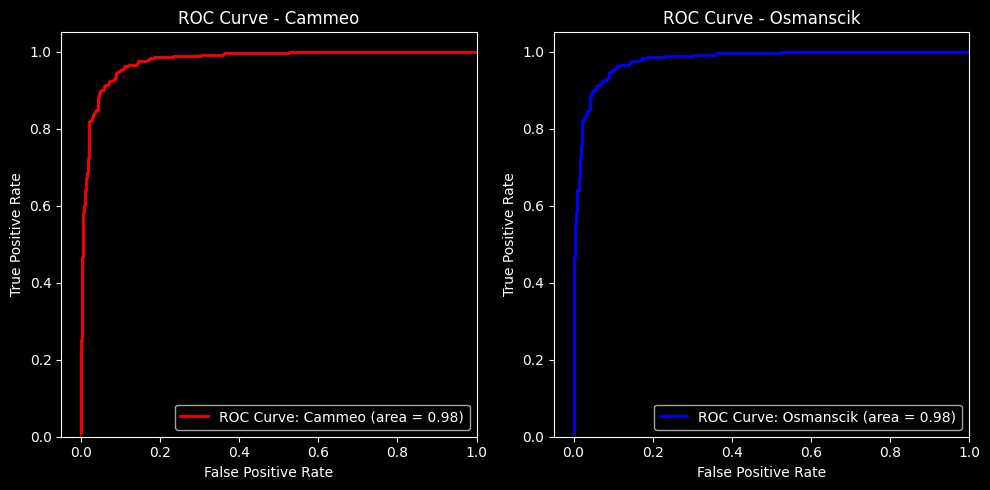

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       518
           1       0.93      0.93      0.93       625

    accuracy                           0.92      1143
   macro avg       0.92      0.92      0.92      1143
weighted avg       0.92      0.92      0.92      1143

[[475  43]
 [ 45 580]]


In [139]:
from sklearn.metrics import classification_report, confusion_matrix

roc_plot(y_test, np.array(y_pred))

y_pred = (y_pred >= 0.5).astype(int)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))